# Fraud Detection with Machine Learning

Machine learning for fraud detection works on the basis of large, historical datasets that have been aggregated across many clients. The data serve as the training set and allow businesses to build efficient machine-learning-based fraud detection systems with optimized performance. Compared to standard predictive modeling problem, fraud detection is characterized with skewed class distribution, or class imbalance, since fraud is a relatively rare event. Therefore, one challenge of fraud detection with Machine Learning is to mitigate the class imbalance problem.  

The goal of this project is to build supervised classification model for fraud detection using preprocessed and anonymized credit card transaction data. The main focus will be on dealing with class imbalance. 

## 1. Environment Set Up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [2]:
%load_ext version_information
%version_information numpy, pandas, matplotlib, seaborn, sklearn, keras, imblearn

Software,Version
Python,3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython,5.1.0
OS,Darwin 16.1.0 x86_64 i386 64bit
numpy,1.13.0
pandas,0.18.1
matplotlib,1.5.3
seaborn,0.7.1
sklearn,0.18.1
keras,2.0.3
imblearn,0.2.1


## 2. Analysis

### 2.1 Data Exploration

The dataset (available in [Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud) contains transactions made by credit cards in September 2013 by european cardholders. 

In [3]:
data = pd.read_csv('../data/creditcard.csv')
print(data.shape)
data.head()

(284807, 30)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26       284807 non-null float64
V27  

In [5]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,3.923752e-15,5.559442e-16,-8.769520e-15,2.759583e-15,-1.549320e-15,2.005278e-15,-1.695447e-15,-1.933764e-16,-3.136288e-15,1.771777e-15,...,1.540693e-16,7.961936e-16,5.402018e-16,4.459446e-15,1.446667e-15,1.705578e-15,-3.668456e-16,-1.203990e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


It contains only numerical input variables, including 28 features which are the result of a PCA transformation, and 1 feature which has not been transformed with PCA, `'Amount'`. The target variable for the dataset is `'Class'`. It takes value 1 in case of fraud and 0 otherwise. Also, there are no missing values in the dataset.  

There are 492 frauds out of 284807 transactions.
The percentage of fraudulent transactions is 0.173%.


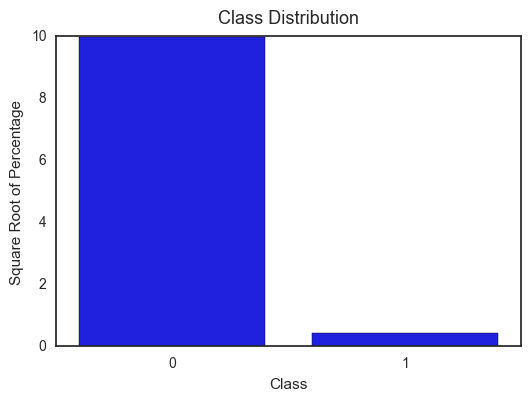

In [6]:
# class distribution
print('There are {} frauds out of {} transactions.'.format(data.Class.sum(), data.shape[0]))
print('The percentage of fraudulent transactions is {:.3f}%.'.format(100*data.Class.sum()/data.shape[0]))

# plot class distribution
ax = sns.barplot(x='Class', y='Class', data=data, estimator=lambda x: np.sqrt(100*len(x)/len(data)), color='blue')
ax.set(ylabel="Square Root of Percentage")
plt.title('Class Distribution', y=1.02, fontsize=13);

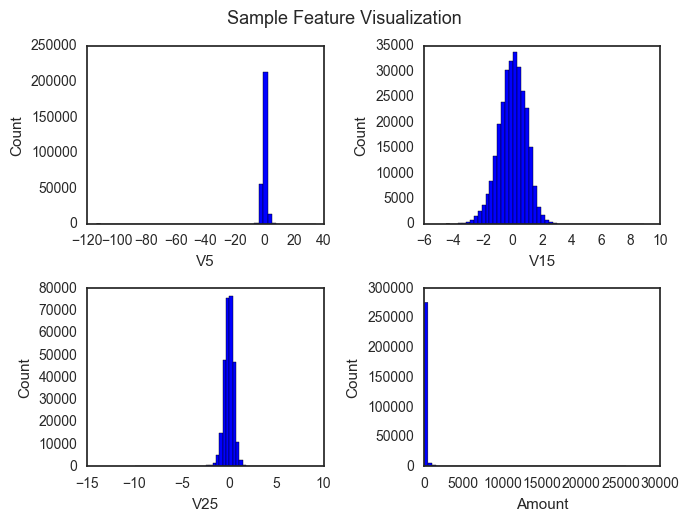

In [7]:
# visualization of some selected features
fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(221)
sns.distplot(data['V5'], hist_kws={'color': 'blue', 'alpha': 1}, kde=False, ax=ax1)
ax1.set_ylabel('Count')

ax2 = fig.add_subplot(222)
sns.distplot(data['V15'], hist_kws={'color': 'blue', 'alpha': 1}, kde=False, ax=ax2)
ax2.set_ylabel('Count')

ax3 = fig.add_subplot(223)
sns.distplot(data['V25'], hist_kws={'color': 'blue', 'alpha': 1}, kde=False, ax=ax3)
ax3.set_ylabel('Count')

ax4 = fig.add_subplot(224)
sns.distplot(data['Amount'], hist_kws={'color': 'blue', 'alpha': 1}, kde=False, ax=ax4)
ax4.set_xlabel('Amount')
ax4.set_ylabel('Count')

plt.tight_layout()
plt.suptitle('Sample Feature Visualization', fontsize=13, y=1.03);

`'Amount'` is highly skewed. Feature normalization needs to be done before building the model. 

### 2.2 Models

1. Build classification models 
    - probabilistic classifier: traditional algorithms and neural networks
    - with and without adjusting class weight at the algorithm level (setting `class_weight` to 'balanced' if applicable)
2. Compare models with precision-recall curve and the areas under the curves
3. Carry out SMOTE and measure the performance of models trained on the new traning set

#### Traditional Probabilistic Models

In [8]:
# seperate features and label
features = data.drop(['Class'], axis=1)
label = data['Class']

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=0)
print("Training set size: {} rows".format(X_train.shape[0]))
print("Test set size: {} rows".format(X_test.shape[0]))

Training set size: 227845 rows
Test set size: 56962 rows


In [9]:
# normalize features 
standardizer = StandardScaler()
X_train = standardizer.fit_transform(X_train)
X_test = standardizer.transform(X_test)

In [10]:
# models for test
# these are all natually probabilistic classification algorithms
# adjust class weight by setting 'class_weight' to 'balanced' 
models = []
models.append(('NB', GaussianNB()))
models.append(('LR', LogisticRegression(random_state=0)))
models.append(('LR_balanced', LogisticRegression(random_state=0, class_weight='balanced')))
models.append(('CART', DecisionTreeClassifier(random_state=0)))
models.append(('CART_balanced', DecisionTreeClassifier(random_state=0, class_weight='balanced')))
models.append(('RF', RandomForestClassifier(random_state=0)))
models.append(('RF_balanced', RandomForestClassifier(random_state=0, class_weight='balanced')))

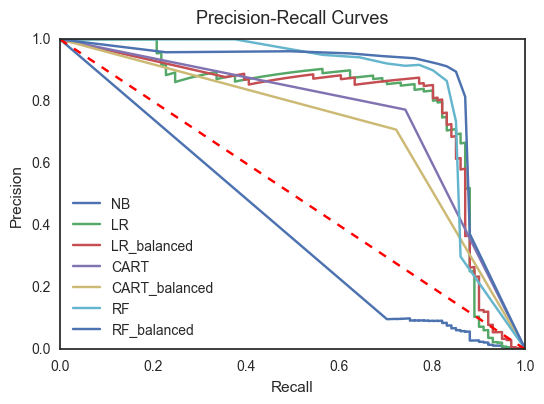

In [46]:
# compare the models using precision-recall curves
for label, model in models:
    # train the model
    clf = model.fit(X_train, y_train)
    pred_proba = clf.predict_proba(X_test)
    # plot precision-recall cueve
    precision, recall, thresholds = precision_recall_curve(y_test, pred_proba[:, 1])
    plt.plot(recall, precision, label=label)

plt.plot([0,1],[1,0],'r--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.title('Precision-Recall Curves', fontsize=13, y=1.03);

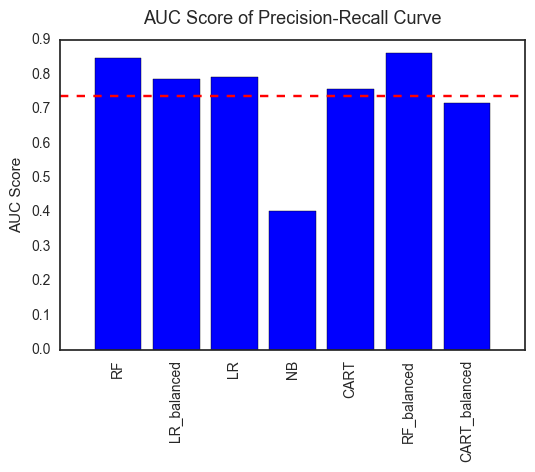

In [12]:
# area under precision-recall curve - capture the overall quality of the model
auc_pr = {}
for label, model in models:
    clf = model.fit(X_train, y_train)
    pred_proba = clf.predict_proba(X_test)
    auc_pr[label] = average_precision_score(y_test, pred_proba[:, 1])

# plot auc scores for different models
plt.bar(range(len(auc_pr)), auc_pr.values(), align='center', color='blue')
plt.axhline(y=sum(auc_pr.values())/len(auc_pr), color='r', linestyle='dashed')
plt.xticks(range(len(auc_pr)), auc_pr.keys(), rotation='vertical')
plt.ylabel('AUC Score')
plt.title('AUC Score of Precision-Recall Curve', fontsize=13, y=1.03);

In [13]:
# maximum AUC score and mean AUC score
print("The maximum AUC score of Precision-Recall Curve is {:.3f}".format(max(auc_pr.values())))
print("The mean AUC score of Precision-Recall Curve is {:.3f}".format(sum(auc_pr.values())/len(auc_pr)))

The maximum AUC score of Precision-Recall Curve is 0.861
The mean AUC score of Precision-Recall Curve is 0.738


With precision-recall curve, a model is overall better if the curve is closer to the top right of the chart where precision and recall are both 1.0. So in this particular case, Random Forest model with `'class_weight'` set to be 'balanced' seems to be the best. The comparison of areas under the precision-recall curves also shows that Random Forest model (balanced) gives the largest area followed by regular Random Forest model, and logistic model (balanced). 

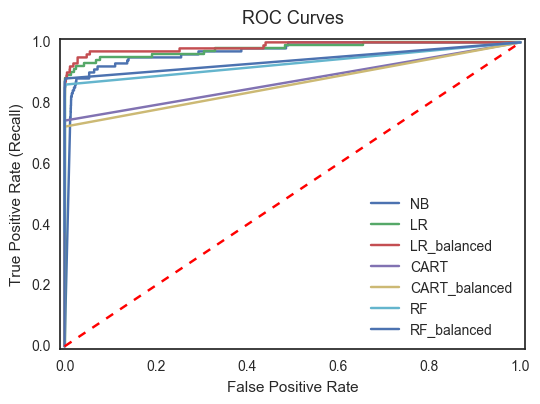

In [15]:
# compare the models using ROC curves
for label, model in models:
    # train the model
    clf = model.fit(X_train, y_train)
    pred_proba = clf.predict_proba(X_test)
    # plot ROC curve 
    fp, tp, thresholds = roc_curve(y_test, pred_proba[:, 1])
    plt.plot(fp, tp, label=label)
    
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='lower right')
plt.title('ROC Curves', fontsize=13, y=1.03)

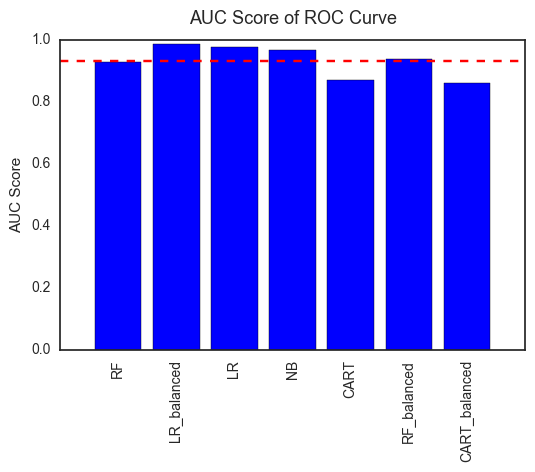

In [17]:
# compare the models using area under the ROC curves
auc_roc = {}
for label, model in models:
    clf = model.fit(X_train, y_train)
    pred_proba = clf.predict_proba(X_test)
    auc_roc[label] = roc_auc_score(y_test, pred_proba[:, 1])

# plot auc scores for different models
plt.bar(range(len(auc_roc)), auc_roc.values(), align='center', color='blue')
plt.axhline(y=sum(auc_roc.values())/len(auc_roc), color='r', linestyle='dashed')
plt.xticks(range(len(auc_roc)), auc_roc.keys(), rotation='vertical')
plt.ylabel('AUC Score')
plt.title('AUC Score of ROC Curve', fontsize=13, y=1.03);

In [18]:
# maximum AUC score and mean AUC score
print("The maximum AUC score is {:.3f}".format(max(auc_roc.values())))
print("The mean AUC score is {:.3f}".format(sum(auc_roc.values())/len(auc_roc)))

The maximum AUC score is 0.987
The mean AUC score is 0.934


The ideal ROC curve hugs the top left of the chart (where recall is 1.0 and the false positive rate is 0.0). From the above ROC curves, it seems that logistic regression with with `'class_weight'` set to be 'balanced' is the best. It also gives the largest area under the ROC curve. 

*NOTE:* The precision-recall curve and the ROC curve appear to give inconsistent results. In particular, for Naive Bayes model, the two metrics give completely opposite result. Why is this? It is actually known that when dealing with highly skewed datasets, presision-recall curve provides a more informative picture of the algorithm's performance than the ROC curve. Therefore, only precision-recall curve will be evaluated from now on.

#### Neural Network Model

We can also build a simple 3-layer neural network without any further optimization to see how it performs compared to the models above. `Keras` is used to build the neural network. 

In [29]:
# build 3-layer neural network model
ANN = Sequential()
ANN.add(Dense(15, activation='relu', input_dim=29))
ANN.add(Dropout(0.1))
ANN.add(Dense(15, activation='relu'))
ANN.add(Dropout(0.1))
ANN.add(Dense(1, activation='sigmoid'))
ANN.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
ANN.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
227845/227845 [==============================] - 13s - loss: 0.0198 - acc: 0.9960    
Epoch 2/10
227845/227845 [==============================] - 13s - loss: 0.0079 - acc: 0.9992    
Epoch 3/10
227845/227845 [==============================] - 13s - loss: 0.0071 - acc: 0.9993    
Epoch 4/10
227845/227845 [==============================] - 14s - loss: 0.0067 - acc: 0.9994    
Epoch 5/10
227845/227845 [==============================] - 13s - loss: 0.0064 - acc: 0.9994    
Epoch 6/10
227845/227845 [==============================] - 14s - loss: 0.0065 - acc: 0.9994    
Epoch 7/10
227845/227845 [==============================] - 13s - loss: 0.0064 - acc: 0.9994    
Epoch 8/10
227845/227845 [==============================] - 14s - loss: 0.0065 - acc: 0.9994    
Epoch 9/10
227845/227845 [==============================] - 12s - loss: 0.0065 - acc: 0.9994    
Epoch 10/10
227845/227845 [==============================] - 12s - loss: 0.0066 - acc: 0.9994    


Area under precision-recall curve is: 0.7736000917386212


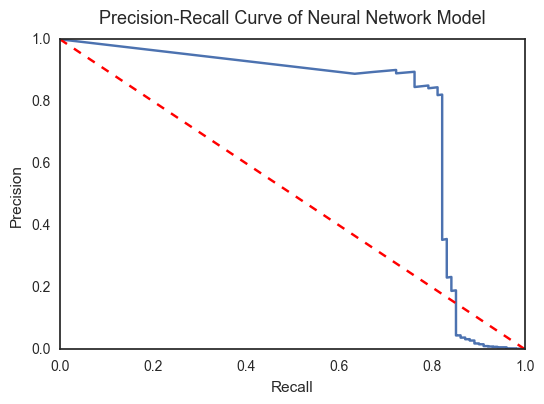

In [30]:
# plot the precision-recall curve
pred_proba = ANN.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, pred_proba)
plt.plot(recall, precision)
plt.plot([0, 1], [1, 0], 'r--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve of Neural Network Model', fontsize=13, y=1.03);

print("Area under precision-recall curve is: {}".format(average_precision_score(y_test, pred_proba)))

The presicion-recall performance of this neural network model is not as good as the best classification model found above (balanced Random Forest model with AUC score of 0.861). 

#### SMOTE

In addition to the algorithm level approach such as adjusting class weight and varying decision threshold, another common approach for class imbalance is balancing the data, for example, SMOTE (Synthetic Minority Oversampling TEchnique).  

SMOTE creates synthetic samples from the minority class instead of making duplicates. The algorithm selects two or more similar instances, i.e., nearest neighbors (using a distance measure), and perturbs an instance one attribute at a time by a random amount within the difference to the neighboring instances to construct new minority instances. Compared to traditional oversampling, SMOTE creates similar examples instead of exact copies of the minority class, which results in more general models and avoids overfitting.    

In [31]:
# apply SMOTE to training set
smotesampler = SMOTE(random_state=0)
smote_features, smote_labels = smotesampler.fit_sample(X_train, y_train)

In [32]:
print("Training size before SMOTE: {} rows".format(X_train.shape[0]))
print("Training size after SMOTE: {} rows".format(smote_features.shape[0]))

new_percentage = 100*len(smote_labels[smote_labels==1])/smote_features.shape[0]
print('The percentage of fraudulent transactions is {}%.'.format(new_percentage))

Training size before SMOTE: 227845 rows
Training size after SMOTE: 454908 rows
The percentage of fraudulent transactions is 50.0%.


Now the new training set is balanced. We can use the new training set to train the model.

In [33]:
# models for test
models_smote = []
models_smote.append(('NB', GaussianNB()))
models_smote.append(('LR', LogisticRegression(random_state=0)))
models_smote.append(('CART', DecisionTreeClassifier(random_state=0)))
models_smote.append(('RF', RandomForestClassifier(random_state=0)))

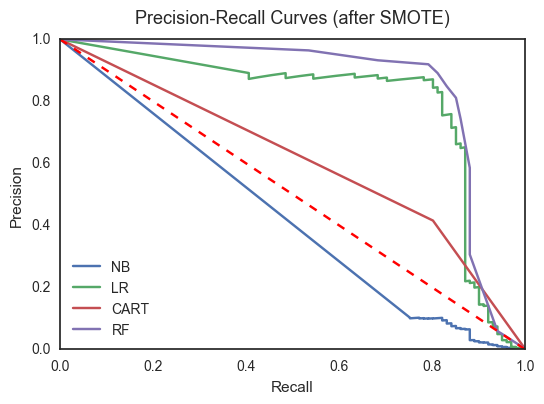

In [47]:
# compare the models using precision-recall curves
for label, model in models_smote:
    # train the model
    clf = model.fit(smote_features, smote_labels)
    pred_proba = clf.predict_proba(X_test)
    # plot precision-recall cueve
    precision, recall, thresholds = precision_recall_curve(y_test, pred_proba[:, 1])
    plt.plot(recall, precision, label=label)

plt.plot([0,1],[1,0],'r--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.title('Precision-Recall Curves (after SMOTE)', fontsize=13, y=1.03);

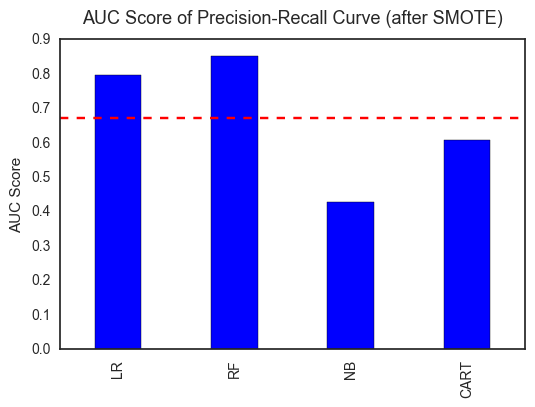

In [39]:
# area under precision-recall curve
auc_pr_2 = {}
for label, model in models_smote:
    clf = model.fit(smote_features, smote_labels)
    pred_proba = clf.predict_proba(X_test)
    auc_pr_2[label] = average_precision_score(y_test, pred_proba[:, 1])

# plot auc scores for different models
plt.bar(range(len(auc_pr_2)), auc_pr_2.values(), align='center', color='blue', width=0.4)
plt.axhline(y=sum(auc_pr_2.values())/len(auc_pr_2), color='r', linestyle='dashed')
plt.xticks(range(len(auc_pr_2)), auc_pr_2.keys(), rotation='vertical')
plt.ylabel('AUC Score')
plt.title('AUC Score of Precision-Recall Curve (after SMOTE)', fontsize=13, y=1.03)

In [43]:
# maximum AUC score and mean AUC score
print("The mean AUC score of Precision-Recall Curve (after SMOTE) is {:.3f}".format(sum(auc_pr_2.values())/len(auc_pr_2)))
print("The Random Forest model has the maximum AUC score (after SMOTE): {:.3f}".format(max(auc_pr_2.values())))
print("The AUC score of Random Forest Model before SMOTE is {:.3f}".format(auc_pr['RF']))

The mean AUC score of Precision-Recall Curve (after SMOTE) is 0.671
The Random Forest model has the maximum AUC score (after SMOTE): 0.852
The AUC score of Random Forest Model before SMOTE is 0.849


**AUC score of RF (balanced) 0.861 > RF (after SMOTE) 0.852 > RF 0.849**  
It seems that for this particular case, adjusting the class weight is slightly better than SMOTE, but both improve the performance of the model. 

In [44]:
# the performance of the above 3-layer neural network model on the new dataset
ANN_2 = Sequential()
ANN_2.add(Dense(15, activation='relu', input_dim=29))
ANN_2.add(Dropout(0.1))
ANN_2.add(Dense(15, activation='relu'))
ANN_2.add(Dropout(0.1))
ANN_2.add(Dense(1, activation='sigmoid'))
ANN_2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
ANN_2.fit(smote_features, smote_labels, batch_size=32, epochs=10)

Epoch 1/10
454908/454908 [==============================] - 27s - loss: 0.0602 - acc: 0.9778    
Epoch 2/10
454908/454908 [==============================] - 31s - loss: 0.0254 - acc: 0.9937    
Epoch 3/10
454908/454908 [==============================] - 28s - loss: 0.0242 - acc: 0.9948    
Epoch 4/10
454908/454908 [==============================] - 27s - loss: 0.0232 - acc: 0.9950    
Epoch 5/10
454908/454908 [==============================] - 26s - loss: 0.0200 - acc: 0.9957    
Epoch 6/10
454908/454908 [==============================] - 26s - loss: 0.0187 - acc: 0.9960    
Epoch 7/10
454908/454908 [==============================] - 26s - loss: 0.0179 - acc: 0.9960    
Epoch 8/10
454908/454908 [==============================] - 26s - loss: 0.0182 - acc: 0.9961    
Epoch 9/10
454908/454908 [==============================] - 28s - loss: 0.0172 - acc: 0.9963    
Epoch 10/10
454908/454908 [==============================] - 28s - loss: 0.0174 - acc: 0.9963    


Area under precision-recall curve (after SMOTE) is: 0.781


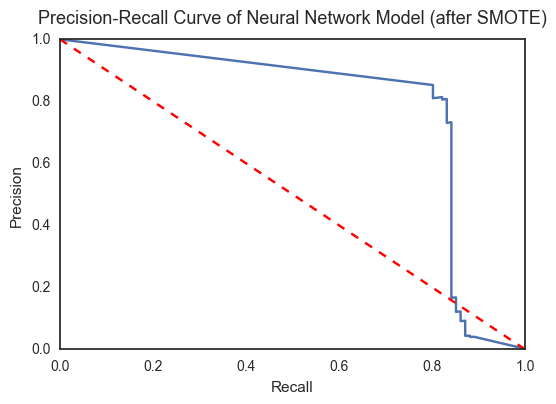

In [45]:
# plot the precision-recall curve
pred_proba = ANN_2.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, pred_proba)
plt.plot(recall, precision)
plt.plot([0, 1], [1, 0], 'r--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve of Neural Network Model (after SMOTE)', fontsize=13, y=1.03);

print("Area under precision-recall curve (after SMOTE) is: {:.3f}".format(average_precision_score(y_test, pred_proba)))

The AUC score improved after SMOTE (from 0.774 to 0.781), but it is still not as good as Random Forest model.

## 3. Summary

This notebook explores approaches for handling class imbalance, namely, adjust class weight, SMOTE, and use precision-recall curve as performance measure. 
- Both adjusting the class weight and SMOTE result in better model performance as measured by the precision-recall curve.  
- Random Forest model turns out to be the best performing model compared to Naive Bayes, Logistic Regression, Decision Tree Classifier, and artificial neural networks.  
- Adjusting class weight of Random Forest model gives slightly better performance than training the model on SMOTE-balanced dataset.  